In [ ]:
# This code replicates all the charts and tables of the Coinbase response to the
# EIOPA consultation paper on technical advice on standard formula capital
# requirements for investments in crypto-assets.
# CONSULTATION PAPER can be found :
# https://www.eiopa.europa.eu/document/download/e778d7bf-ad0e-42eb-abb7-912eabb6f852_en?filename=CP%20on%20technical%20advice%20on%20standard%20formula%20capital%20requirements%20for%20investments%20in%20crypto%20assets.pdf
# Coinbase's response can be found :


# Import Packages and load up Stock list

In [2]:
# -*- coding: utf-8 -*-
"""stoxx600"""
!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import time
import requests

from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Import Stock List STOXX600 Tech
#dir = '/content/drive/MyDrive/'
dir = '/content/drive/MyDrive/Coinbase/EIOPA/'
stock_list = pd.read_csv(dir + "stoxx600_20241202.csv", delimiter=';')
stock_list = stock_list[:600]
# Add BTC and ETH
stock_list = pd.concat([stock_list, pd.DataFrame({'ISIN': 'BTC-EUR', 'RIC': 'BTC'}, index=[0])], ignore_index=True)
stock_list = pd.concat([stock_list, pd.DataFrame({'ISIN': 'ETH-EUR', 'RIC': 'ETH'}, index=[0])], ignore_index=True)

# Set sample period
win = 10
start = str(2024-win + 1) + '-01-01'
end = '2024-12-31'


#Download Data (to be run only once, to get the data)

In [7]:
#download data from YFINANCE

# Get data from STOXX600 index
stoxx = yf.Ticker('EXSA.DE')
df_stoxx = stoxx.history(start = start, end = end)
df_stoxx.to_csv(dir+'df_stoxx.csv')

# For each stock in STOXX600 tech and BTC/ETH
df_tot = pd.DataFrame(columns=['ISIN','RIC', 'Market Cap', 'Trading Volume', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
#df_tot = pd.read_csv(dir+'df_tot.csv')
session = requests.Session()

for isin in stock_list['ISIN']:
      if ~df_tot['ISIN'].isin([isin]).any():
        time.sleep(5)
        stock = yf.Ticker(isin, session=session)
        df = stock.history(start = start, end = end)
        df['ISIN'] = isin
        df['RIC'] =  stock_list['RIC'][stock_list.index[stock_list['ISIN'].isin([isin])].to_list()[0]]
        try:
          mc = stock.info['marketCap']
        except:
          mc = np.nan
        try:
          tv = stock.info['volume']
        except:
          tv = np.nan
        try:
          cu = stock.info['currency']
        except:
          cu = np.nan
        df['Market Cap'] = mc
        df['Trading Volume'] = tv
        df['Currency'] = cu
        df_tot = pd.concat([df_tot, df])

df_tot.to_csv(dir+'df_tot.csv')


<ipython-input-7-b307b7e620c3>:35: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_tot = pd.concat([df_tot, df])
<ipython-input-7-b307b7e620c3>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tot = pd.concat([df_tot, df])
ERROR:yfinance:Could not get exchangeTimezoneName for ticker '' reason: 'chart'
ERROR:yfinance:$: possibly delisted; no timezone found
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/?modules=financialData%2CquoteType%2CdefaultKeyStatistics

In [1]:
# DOWNLOAD EXCHANGE RATES
EURUSD = yf.Ticker("EURUSD=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURUSD.index = EURUSD['Date'].astype(str).str[:10]
EURUSD = EURUSD.drop(columns=['Date'])
EURUSD = EURUSD.rename(columns={'Close': 'EURUSD'})
EURUSD.index = pd.to_datetime(EURUSD.index)
EURUSD.index = EURUSD.index.strftime('%Y-%m-%d')
EURUSD.index = pd.to_datetime(EURUSD.index)
EURUSD

EURGBP = yf.Ticker("EURGBP=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURGBP.index = EURGBP['Date'].astype(str).str[:10]
EURGBP = EURGBP.drop(columns=['Date'])
EURGBP = EURGBP.rename(columns={'Close': 'EURGBP'})
EURGBP.index = pd.to_datetime(EURGBP.index)
EURGBP.index = EURGBP.index.strftime('%Y-%m-%d')
EURGBP.index = pd.to_datetime(EURGBP.index)
EURGBP

EURCHF = yf.Ticker("EURCHF=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURCHF.index = EURCHF['Date'].astype(str).str[:10]
EURCHF = EURCHF.drop(columns=['Date'])
EURCHF = EURCHF.rename(columns={'Close': 'EURCHF'})
EURCHF.index = pd.to_datetime(EURCHF.index)
EURCHF.index = EURCHF.index.strftime('%Y-%m-%d')
EURCHF.index = pd.to_datetime(EURCHF.index)
EURCHF

EURDKK = yf.Ticker("EURDKK=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURDKK.index = EURDKK['Date'].astype(str).str[:10]
EURDKK = EURDKK.drop(columns=['Date'])
EURDKK = EURDKK.rename(columns={'Close': 'EURDKK'})
EURDKK.index = pd.to_datetime(EURDKK.index)
EURDKK.index = EURDKK.index.strftime('%Y-%m-%d')
EURDKK.index = pd.to_datetime(EURDKK.index)
EURDKK

EURSEK = yf.Ticker("EURSEK=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURSEK.index = EURSEK['Date'].astype(str).str[:10]
EURSEK = EURSEK.drop(columns=['Date'])
EURSEK = EURSEK.rename(columns={'Close': 'EURSEK'})
EURSEK.index = pd.to_datetime(EURSEK.index)
EURSEK.index = EURSEK.index.strftime('%Y-%m-%d')
EURSEK.index = pd.to_datetime(EURSEK.index)
EURSEK

EURNOK = yf.Ticker("EURNOK=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURNOK.index = EURNOK['Date'].astype(str).str[:10]
EURNOK = EURNOK.drop(columns=['Date'])
EURNOK = EURNOK.rename(columns={'Close': 'EURNOK'})
EURNOK.index = pd.to_datetime(EURNOK.index)
EURNOK.index = EURNOK.index.strftime('%Y-%m-%d')
EURNOK.index = pd.to_datetime(EURNOK.index)
EURNOK

EURPLN = yf.Ticker("EURPLN=X", session=session).history(start=start, end=end)['Close'].reset_index()
EURPLN.index = EURPLN['Date'].astype(str).str[:10]
EURPLN = EURPLN.drop(columns=['Date'])
EURPLN = EURPLN.rename(columns={'Close': 'EURPLN'})
EURPLN.index = pd.to_datetime(EURPLN.index)
EURPLN.index = EURPLN.index.strftime('%Y-%m-%d')
EURPLN.index = pd.to_datetime(EURPLN.index)
EURPLN

forex = EURUSD.merge(EURGBP, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURCHF, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURDKK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURSEK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURNOK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURPLN, left_index = True, right_index = True, how = 'outer')
forex.to_csv(dir+'forex.csv')



NameError: name 'yf' is not defined

In [12]:
forex = EURUSD.merge(EURGBP, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURCHF, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURDKK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURSEK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURNOK, left_index = True, right_index = True, how = 'outer')
forex = forex.merge(EURPLN, left_index = True, right_index = True, how = 'outer')
forex.to_csv(dir+'forex.csv')

#Create main database using csv files


In [92]:
df_tot = pd.read_csv(dir+'df_tot.csv', index_col = 'Unnamed: 0')
df_tot.index = df_tot.index.astype(str).str[:10]
df_tot.index = pd.to_datetime(df_tot.index)
df_tot.index = df_tot.index.strftime('%Y-%m-%d')
df_tot.index = pd.to_datetime(df_tot.index)
df_tot = df_tot.set_index(['ISIN', df_tot.index]) # Set 'ISIN' and the current index as the MultiIndex
df_tot.index.names = ['ISIN', 'Date'] # Rename the index levels for clarity

df_stoxx = pd.read_csv(dir+'df_stoxx.csv', index_col = 'Date')
df_stoxx.index = df_stoxx.index.astype(str).str[:10]
df_stoxx.index = pd.to_datetime(df_stoxx.index)
df_stoxx.index = df_stoxx.index.strftime('%Y-%m-%d')
df_stoxx.index = pd.to_datetime(df_stoxx.index)
df_stoxx.rename(columns = {'Close' : 'Stoxx Close'}, inplace = True)

forex = pd.read_csv(dir+'forex.csv', index_col = 'Date')
forex.index = forex.index.astype(str).str[:10]
forex.index = pd.to_datetime(forex.index)
forex.index = forex.index.strftime('%Y-%m-%d')
forex.index = pd.to_datetime(forex.index)


df_tot = df_tot.merge(forex, how='inner', left_index = True, right_index=True)
df_tot = df_tot.merge(df_stoxx['Stoxx Close'], how='inner', left_index = True, right_index=True)


In [93]:
# convert prices, marketcap, and trading volume to EUR
df_tot['Close (EUR)'] = df_tot['Close']
df_tot['Market Cap (EUR)'] = df_tot['Market Cap']
df_tot['Trading Volume (EUR)'] = df_tot['Trading Volume']

df_tot.loc[df_tot['Currency'] == 'GBp', 'Currency'] = 'GBP'
for cur in ['USD', 'GBP', 'CHF', 'DKK', 'SEK', 'NOK', 'PLN']:
  df_tot.loc[df_tot['Currency'] == cur, 'Close (EUR)'] = df_tot.loc[df_tot['Currency'] == cur, 'Close'] / df_tot.loc[df_tot['Currency'] == cur, 'EUR'+cur]
  df_tot.loc[df_tot['Currency'] == cur, 'Market Cap (EUR)'] = df_tot.loc[df_tot['Currency'] == cur, 'Market Cap']/df_tot['EUR' + cur].iloc[-1]
  df_tot.loc[df_tot['Currency'] == cur, 'Trading Volume (EUR)'] = df_tot.loc[df_tot['Currency'] == cur, 'Trading Volume']/df_tot['EUR' + cur].iloc[-1]



In [94]:
# Define Returns, MDD,

df_tot['Return'] = df_tot.groupby('ISIN')['Close (EUR)'].pct_change() + 1
df_tot['Stoxx Return'] = df_tot.groupby('ISIN')['Stoxx Close'].pct_change() + 1

df_tot['Return365'] =  df_tot.groupby('ISIN')['Return'].rolling(window='365D', on = df_tot.index.get_level_values('Date')).apply(lambda x: x.prod() - 1).droplevel(0, axis = 0)
df_tot['Close_max_roll'] = df_tot.groupby('ISIN').rolling(window='365D', on = df_tot.index.get_level_values('Date'))['Close (EUR)'].max()
df_tot['MDD'] = (df_tot['Close (EUR)'] - df_tot['Close_max_roll']) / df_tot['Close_max_roll']
df_tot['MDD_roll'] = df_tot.groupby('ISIN')['MDD'].rolling(window='365D', on = df_tot.index.get_level_values('Date')).min().droplevel(0, axis = 0)
df_tot = df_tot.merge(df_tot.groupby('ISIN')['MDD_roll'].min().rename('MDD_max'), left_index = True, right_index = True, how = 'left')
df_tot['nrow_today'] = df_tot.reset_index().index + 1
df_tot['trading_days_roll'] = df_tot.groupby('ISIN')['nrow_today'].rolling(window='365D', on = df_tot.index.get_level_values('Date')).count().droplevel(0, axis = 0)
df_tot['trading_days_roll'] = df_tot['trading_days_roll'].astype(int)


<ipython-input-94-cd87f0f99c3d>:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_tot['Return'] = df_tot.groupby('ISIN')['Close (EUR)'].pct_change() + 1


In [99]:
#Define Var95
df_tot['VAR95_roll1y'] = df_tot.groupby('ISIN').rolling(window='365D', on = df_tot.index.get_level_values('Date'))['Return365'].quantile(0.005)
df_tot['VAR95_roll5y'] = df_tot.groupby('ISIN').rolling(window=254*5, on = df_tot.index.get_level_values('Date'))['Return365'].quantile(0.005)
df_tot = df_tot.merge(df_tot.groupby('ISIN')['Return365'].quantile(0.005).rename('VAR95_max'), left_index = True, right_index = True, how = 'left')

#Define Volatility, Correlation, and Beta
df_tot['Vol_1yrol'] = df_tot.groupby('ISIN').rolling(window='365D', on = df_tot.index.get_level_values('Date'))['Return'].std()
df_tot['Corr_1yrol'] = df_tot.groupby('ISIN').rolling(window='365D', on = df_tot.index.get_level_values('Date'))[['Return', 'Stoxx Return']].corr().loc[pd.IndexSlice[:,:, 'Stoxx Return'], 'Return'].droplevel(2, axis = 0)  # Select the correlation value you need

Vol = df_tot.groupby('ISIN')['Return'].std().rename('Vol')
Vol_stoxx = df_tot.groupby('ISIN')['Stoxx Return'].std().rename('Vol Stoxx')
Corr = df_tot.groupby('ISIN')[['Return', 'Stoxx Return']].corr().loc[pd.IndexSlice[:, 'Stoxx Return'], 'Return'].droplevel(1, axis = 0).rename('Corr')  # Select the correlation value you need
Cov = df_tot.groupby('ISIN')[['Return', 'Stoxx Return']].cov().loc[pd.IndexSlice[:, 'Stoxx Return'], 'Return'].droplevel(1, axis = 0).rename('Cov')  # Select the correlation value you need
Beta = Cov.to_frame().merge(Vol_stoxx.to_frame(), left_index = True, right_index = True, how = 'left')
Beta = Beta['Cov'] / (Beta['Vol Stoxx']**2)


,Return365
ISIN,
AT0000606306,-0.418888
AT0000652011,-0.481305
AT0000730007,-0.339091
AT0000743059,-0.558050
AT0000746409,-0.344465
...,...
SE0017832488,-0.635819
SE0018012635,-0.332653
SE0020050417,-0.367194


#Plots


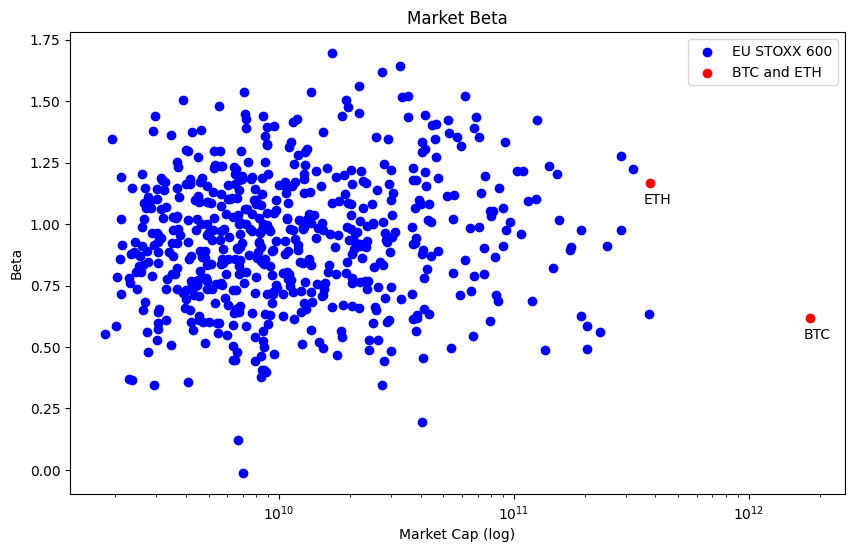

In [186]:
# Plot beta over market cap log
plt.figure(figsize=(10, 6))
plt.xlabel('Market Cap (log)')
plt.ylabel('Beta')
plt.title('Market Beta')

# Scatter plot for points closest to BTC and ETH
x = df_tot.loc[~df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['Market Cap (EUR)'].min()
y = Beta.loc[~Beta.index.isin(['BTC-EUR', 'ETH-EUR'])]
plt.scatter(x, y, color='blue', label='EU STOXX 600')

# Highlight BTC and ETH in red
x_btc_eth = df_tot.loc[df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['Market Cap (EUR)'].min()
y_btc_eth = Beta.loc[Beta.index.isin(['BTC-EUR', 'ETH-EUR'])].rename('Beta')
plt.scatter(x_btc_eth, y_btc_eth, color='red', label='BTC and ETH')

# Annotate points (including BTC and ETH explicitly)
for i, row in x_btc_eth.to_frame().merge(y_btc_eth.to_frame(), left_index = True, right_index = True, how = 'left').reset_index().iterrows():
    plt.annotate(row['ISIN'][:3],(row['Market Cap (EUR)'], row['Beta']), textcoords="offset points",xytext=(5, -15),  ha='center')
plt.xscale('log')

plt.legend()
plt.savefig(dir+'Beta-Mcap.png')
plt.show()


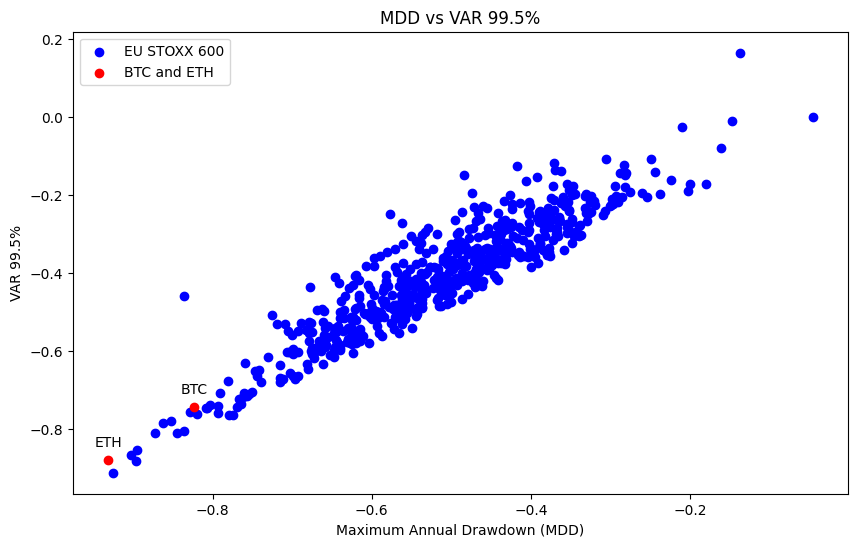

In [185]:
# Plot MDD vs VAR995
plt.figure(figsize=(10, 6))
plt.xlabel('Maximum Annual Drawdown (MDD)')
plt.ylabel('VAR 99.5%')
plt.title('MDD vs VAR 99.5%')

# Scatter plot for Stoxx 600
x = df_tot.loc[~df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['MDD_max'].min()
y = df_tot.loc[~df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['VAR95_max'].min()
plt.scatter(x,y, color='blue', label='EU STOXX 600')

# Highlight BTC and ETH in red
x_btc_eth = df_tot.loc[df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['MDD_max'].min()
y_btc_eth = df_tot.loc[df_tot['RIC'].isin(['BTC', 'ETH'])].groupby('ISIN')['VAR95_max'].min()
plt.scatter(x_btc_eth,y_btc_eth, color='red', label='BTC and ETH')

# Annotate points (including BTC and ETH explicitly)
#for i, row in filtered_plot1.iterrows():
#    plt.annotate(row['RIC'], (row['MDD'], row['VAR995']), textcoords="offset points", xytext=(5, -15), ha='center')
for i, row in x_btc_eth.to_frame().merge(y_btc_eth.to_frame(), left_index = True, right_index = True, how = 'left').reset_index().iterrows():
    plt.annotate(row['ISIN'][:3],(row['MDD_max'], row['VAR95_max']), textcoords="offset points",xytext=(0, 10),  ha='center')

plt.legend()
plt.savefig(dir+'MDD-VAR.png')
plt.show()


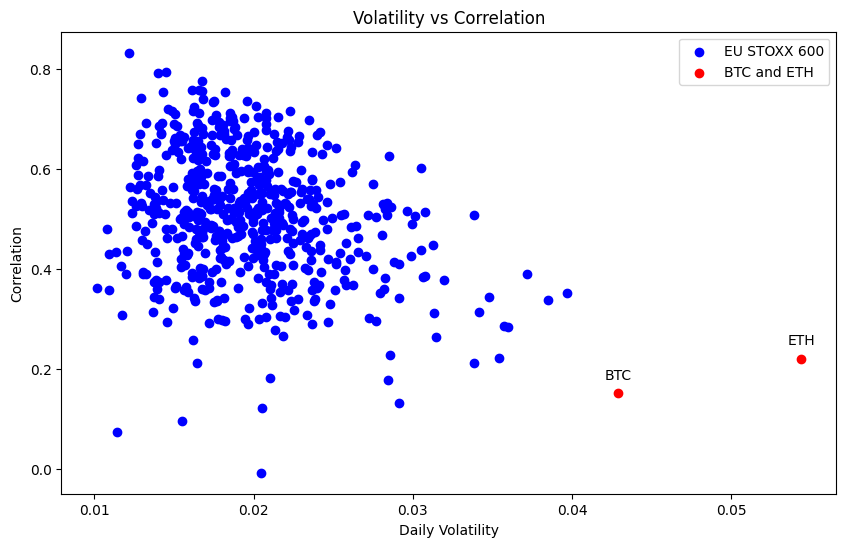

In [187]:
# Plot Volatility vs Correlation (filtered)
plt.figure(figsize=(10, 6))
plt.xlabel('Daily Volatility')
plt.ylabel('Correlation')
plt.title('Volatility vs Correlation')

# Scatter plot for Stoxx 600
x = Vol.loc[~Vol.index.isin(['BTC-EUR', 'ETH-EUR'])]
y = Corr.loc[~Corr.index.isin(['BTC-EUR', 'ETH-EUR'])]
plt.scatter(x,y, color='blue', label='EU STOXX 600')

# Highlight BTC and ETH in red
x_btc_eth = Vol.loc[Vol.index.isin(['BTC-EUR', 'ETH-EUR'])]
y_btc_eth = Corr.loc[Corr.index.isin(['BTC-EUR', 'ETH-EUR'])]
plt.scatter(x_btc_eth,y_btc_eth, color='red', label='BTC and ETH')

# Annotate points (including BTC and ETH explicitly)
#for i, row in filtered_plot1.iterrows():
#    plt.annotate(row['RIC'], (row['MDD'], row['VAR995']), textcoords="offset points", xytext=(5, -15), ha='center')
for i, row in x_btc_eth.to_frame().merge(y_btc_eth.to_frame(), left_index = True, right_index = True, how = 'left').reset_index().iterrows():
    plt.annotate(row['ISIN'][:3],(row['Vol'], row['Corr']), textcoords="offset points",xytext=(0, 10),  ha='center')

plt.legend()
plt.savefig(dir+'Vol-Corr.png')
plt.show()


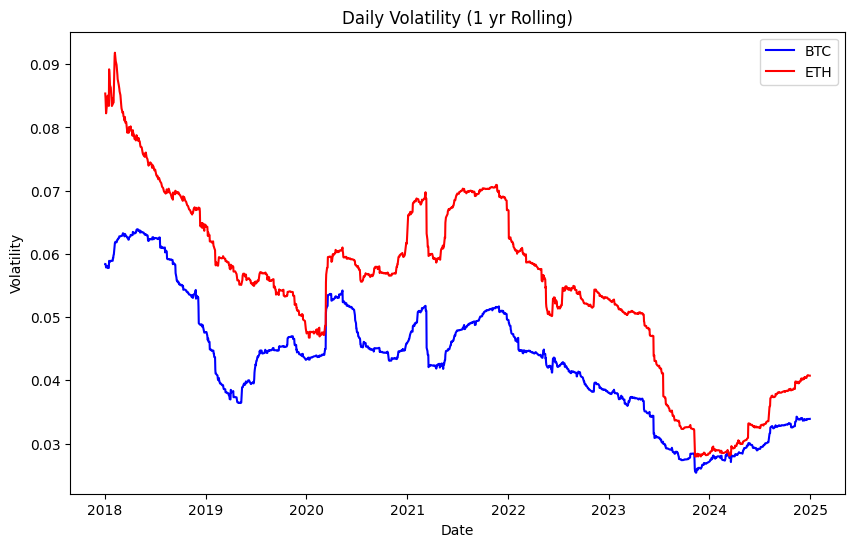

In [188]:
# Plot rolling Volatility for ETH and BTC
plt.figure(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Daily Volatility (1 yr Rolling)')

# Scatter plot for Stoxx 600
y = df_tot.loc[(df_tot.index.get_level_values(0) =='BTC-EUR') & (df_tot.index.get_level_values(1).year>2017), 'Vol_1yrol']
x = df_tot.loc[(df_tot.index.get_level_values(0) =='BTC-EUR') & (df_tot.index.get_level_values(1).year>2017)].index.get_level_values(1)
plt.plot(x,y, color='blue', label='BTC')

y = df_tot.loc[(df_tot.index.get_level_values(0) =='ETH-EUR')& (df_tot.index.get_level_values(1).year>2017), 'Vol_1yrol']
x = df_tot.loc[(df_tot.index.get_level_values(0) =='ETH-EUR')& (df_tot.index.get_level_values(1).year>2017)].index.get_level_values(1)
plt.plot(x,y, color='red', label='ETH')


plt.legend()
plt.savefig(dir+'Vol_roll.png')
plt.show()


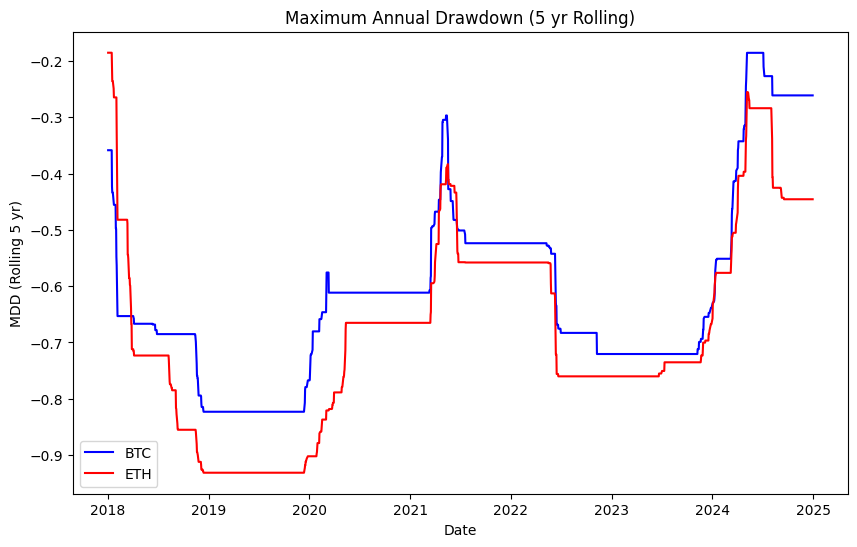

In [189]:
# Plot rolling MDD for ETH and BTC
plt.figure(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('MDD (Rolling 5 yr)')
plt.title('Maximum Annual Drawdown (5 yr Rolling)')

# Scatter plot for Stoxx 600
y = df_tot.loc[(df_tot.index.get_level_values(0) =='BTC-EUR') & (df_tot.index.get_level_values(1).year>2017), 'MDD_roll']
x = df_tot.loc[(df_tot.index.get_level_values(0) =='BTC-EUR') & (df_tot.index.get_level_values(1).year>2017)].index.get_level_values(1)
plt.plot(x,y, color='blue', label='BTC')

y = df_tot.loc[(df_tot.index.get_level_values(0) =='ETH-EUR')& (df_tot.index.get_level_values(1).year>2017), 'MDD_roll']
x = df_tot.loc[(df_tot.index.get_level_values(0) =='ETH-EUR')& (df_tot.index.get_level_values(1).year>2017)].index.get_level_values(1)
plt.plot(x,y, color='red', label='ETH')


plt.legend()
plt.savefig(dir+'MDD_roll.png')
plt.show()
